In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import imageio

input_data = pd.read_csv('ConMat.csv', index_col=None, header=None)
outaged_pole_list = pickle.load( open( "outaged_pole_list.pkl", "rb" ) )
G = nx.Graph(input_data.values)
pos = nx.spring_layout(G, iterations=50, seed=123)

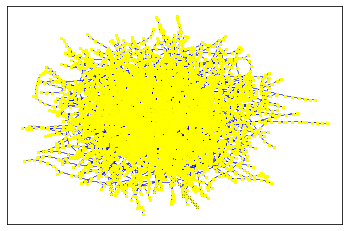

In [12]:
failure_nodes = [1092, 6596, 5000, 6781, 1118, 2234, 6276, 4320, 6590]
for ind in range(len(failure_nodes)):
    failed = failure_nodes[ind:11]
    outagelst = []
    outagenum = []
    for j in range(len(failed)):
        outagelst.append(outaged_pole_list[(failed[j])]) 
        outagenum.append(len(outaged_pole_list[(failed[j])]))
    outagelst1 = [item for elem in outagelst for item in elem]
    for i in range(len(outagelst1)):
        outagelst1[i] = outagelst1[i] - 1

    # Specify the nodes you want here
    black_nodes = outagelst1.copy()
    node_colors = ['yellow' if not node in black_nodes else 'black'
                    for node in G.nodes()]
    yellow_nodes = [node for node in G.nodes() if node not in black_nodes]

    # Specify the edges you want here
    red_edges = []
    edge_colours = ['blue' if not edge in red_edges else 'red'
                    for edge in G.edges()]
    blue_edges = [edge for edge in G.edges() if edge not in red_edges]

    # separate calls to draw nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=yellow_nodes, node_color = 'yellow', node_size = 3)
    nx.draw_networkx_nodes(G, pos, nodelist=black_nodes, node_color = 'black', node_size = 3)
    nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='red', arrows=False, width = 0.1)
    nx.draw_networkx_edges(G, pos, edgelist=blue_edges, edge_color='blue', arrows=False, width = 0.1)

    plt.savefig('Resilient_' + str(ind) + '.png')

In [27]:
gif_name = 'gif_Resilient.gif'
images = []
frame_length = 1
filenames = []
# failure_nodes = [1092, 6596, 5000, 6781, 1118, 2234, 6276, 4320, 6590]
failed = [2,5,6,7,8,8,8,8,8,8]
# failed = [0,1,2,2,3,4,5,6,7,8]

for ind in range(len(failed)):
    temp = failed[ind]
    filenames.append('Resilient_' + str(temp) + '.png')

for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave(gif_name, images,'GIF',duration=frame_length)